In [1]:
!pip install matplotlib_venn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
from os import listdir
from os.path import isfile, join
from pathlib import Path
from time import time
import numpy as np
from matplotlib import pyplot as plt
from matplotlib_venn import venn3
from datetime import datetime
from dnest4.backends import CSVBackend
from matplotlib.patches import Rectangle
from fluxtopus import create_bma_sampler
import seaborn as sns
from matplotlib import gridspec

In [3]:
# %matplotlib agg
# %matplotlib agg
# import dnest4.classic as dn4
# cwd = os.getcwd()


# print('info')
models = [
'crown',
'crown_EDP',
'crown_GOX',
'crown_MGOX',
'crown_EDP_GOX',
'crown_EDP_MGOX',
'crown_GOX_MGOX',
'crown_EDP_GOX_MGOX',
          ]
          


In [4]:
# copied output from running dnest4 to evaluate samples. This was the quickest way to get information and logZ
dn4_info = """
info
begin
crown
log(Z) = -140.40936796702417
Information = 37.83816793632204 nats.
Effective sample size = 11781.181470577334
end
begin
crown_EDP
log(Z) = -141.92698605945273
Information = 40.931307638305924 nats.
Effective sample size = 13318.343194434934
end
begin
crown_GOX
log(Z) = -137.94414870467608
Information = 40.97860841107172 nats.
Effective sample size = 11821.781339330508
end
begin
crown_MGOX
log(Z) = -142.513317530618
Information = 41.56757704415634 nats.
Effective sample size = 11115.269782615213
end
begin
crown_EDP_GOX
log(Z) = -140.71491310029955
Information = 44.87376611079014 nats.
Effective sample size = 11716.590780595821
end
begin
crown_EDP_MGOX
log(Z) = -146.4230868072404
Information = 45.47919886906308 nats.
Effective sample size = 12126.669685281207
end
begin
crown_GOX_MGOX
log(Z) = -140.7518407312067
Information = 44.876491487298324 nats.
Effective sample size = 10329.228535827853
end
begin
crown_EDP_GOX_MGOX
log(Z) = -144.0678352962604
Information = 48.23760577428587 nats.
Effective sample size = 12611.479427854149
end
"""
dn4_uninfo= """
uninfo
begin
crown
log(Z) = -113.72051332910236
Information = 33.300107543186826 nats.
Effective sample size = 14309.756554778618
end
begin
crown_EDP
log(Z) = -114.50424623289443
Information = 33.87443360045296 nats.
Effective sample size = 13644.959177223824
end
begin
crown_GOX
log(Z) = -115.75939173631599
Information = 35.16024249872493 nats.
Effective sample size = 15154.119812355415
end
begin
crown_MGOX
log(Z) = -113.5723075777047
Information = 33.37659830661781 nats.
Effective sample size = 15172.950239730557
end
begin
crown_EDP_GOX
log(Z) = -116.75802081699347
Information = 36.05849302750278 nats.
Effective sample size = 14468.459027568113
end
begin
crown_EDP_MGOX
log(Z) = -113.90342510748394
Information = 33.64207035577732 nats.
Effective sample size = 13207.498600276595
end
begin
crown_GOX_MGOX
log(Z) = -115.95392325382522
Information = 35.44611774338894 nats.
Effective sample size = 13395.582104904433
end
begin
crown_EDP_GOX_MGOX
log(Z) = -116.04507712002585
Information = 35.467490863034456 nats.
Effective sample size = 11992.676924098825
end
"""


In [5]:
uninfo_log_Z = {}
info_log_Z = {}

uninfo_information = {}
info_information = {}

info_lines = [line.strip().split('\n')[:3] for line in dn4_info.split('begin')[1:]]
for n in info_lines:
    model = n[0]
    log_Z = n[1].split("=")[1]
    information = n[2].split("=")[1].split(' ')[1]
    info_log_Z[model] = float(log_Z)
    info_information[model] = float(information)
    
uninfo_lines = [line.strip().split('\n')[:3] for line in dn4_uninfo.split('begin')[1:]]
for n in uninfo_lines:
    model = n[0]
    log_Z = n[1].split("=")[1]
    information = n[2].split("=")[1].split(' ')[1]
    uninfo_log_Z[model] = float(log_Z)
    uninfo_information[model] = float(information)

print(uninfo_log_Z)
print(info_log_Z)
print(uninfo_information)
print(info_information)

x_vals = np.arange(len(uninfo_log_Z.items()))

{'crown': -113.72051332910236, 'crown_EDP': -114.50424623289443, 'crown_GOX': -115.75939173631599, 'crown_MGOX': -113.5723075777047, 'crown_EDP_GOX': -116.75802081699347, 'crown_EDP_MGOX': -113.90342510748394, 'crown_GOX_MGOX': -115.95392325382522, 'crown_EDP_GOX_MGOX': -116.04507712002585}
{'crown': -140.40936796702417, 'crown_EDP': -141.92698605945273, 'crown_GOX': -137.94414870467608, 'crown_MGOX': -142.513317530618, 'crown_EDP_GOX': -140.71491310029955, 'crown_EDP_MGOX': -146.4230868072404, 'crown_GOX_MGOX': -140.7518407312067, 'crown_EDP_GOX_MGOX': -144.0678352962604}
{'crown': 33.300107543186826, 'crown_EDP': 33.87443360045296, 'crown_GOX': 35.16024249872493, 'crown_MGOX': 33.37659830661781, 'crown_EDP_GOX': 36.05849302750278, 'crown_EDP_MGOX': 33.64207035577732, 'crown_GOX_MGOX': 35.44611774338894, 'crown_EDP_GOX_MGOX': 35.467490863034456}
{'crown': 37.83816793632204, 'crown_EDP': 40.931307638305924, 'crown_GOX': 40.97860841107172, 'crown_MGOX': 41.56757704415634, 'crown_EDP_GOX

In [6]:
print(info_log_Z)
print(uninfo_log_Z)

{'crown': -140.40936796702417, 'crown_EDP': -141.92698605945273, 'crown_GOX': -137.94414870467608, 'crown_MGOX': -142.513317530618, 'crown_EDP_GOX': -140.71491310029955, 'crown_EDP_MGOX': -146.4230868072404, 'crown_GOX_MGOX': -140.7518407312067, 'crown_EDP_GOX_MGOX': -144.0678352962604}
{'crown': -113.72051332910236, 'crown_EDP': -114.50424623289443, 'crown_GOX': -115.75939173631599, 'crown_MGOX': -113.5723075777047, 'crown_EDP_GOX': -116.75802081699347, 'crown_EDP_MGOX': -113.90342510748394, 'crown_GOX_MGOX': -115.95392325382522, 'crown_EDP_GOX_MGOX': -116.04507712002585}


In [7]:
max_info = print(max(info_log_Z, key= info_log_Z.get))
max_uninfo = print(max(uninfo_log_Z, key= uninfo_log_Z.get))

crown_GOX
crown_MGOX


In [8]:
info_bayes_factors = np.zeros((len(models), len(models)))
uninfo_bayes_factors = np.zeros((len(models), len(models)))
for i, m in enumerate(models):
    for j, n in enumerate(models):
        info_bayes_factors[i,j] = info_log_Z[m] - info_log_Z[n]
        uninfo_bayes_factors[i,j] = uninfo_log_Z[m] - uninfo_log_Z[n]

In [9]:
def plot_bayes_factors(factors, name):
    fig, ax = plt.subplots()
    ax.set_title(name)
    
    mask = np.tril(np.zeros_like(factors))
    for i in range(mask.shape[0]):
        mask[i][i]=1
    sns.heatmap(factors, yticklabels=models, xticklabels=models, cmap='PiYG', mask=mask)
    
    plt.yticks(rotation=0) 
    plt.xticks(rotation=90) 
    
    # Show all ticks and label them with the respective list entries
    # ax.set_xticks(np.arange(len(models)), labels=models)
    # ax.set_yticks(np.arange(len(models)), labels=models)
    
    # Rotate the tick labels and set their alignment.
    # plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
    #          rotation_mode="anchor")
    # plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
    #          rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    for i in range(len(models)):
        for j in range(len(models)):
            if i == j:
                continue
            text = ax.text(j+0.5, i+0.5, '%.2f' % np.round(factors[i][j], decimals=2),
                           ha="center", va="center", color="k") # , fontdict={'fontsize':10})
    
    fig.tight_layout()
    plt.show()

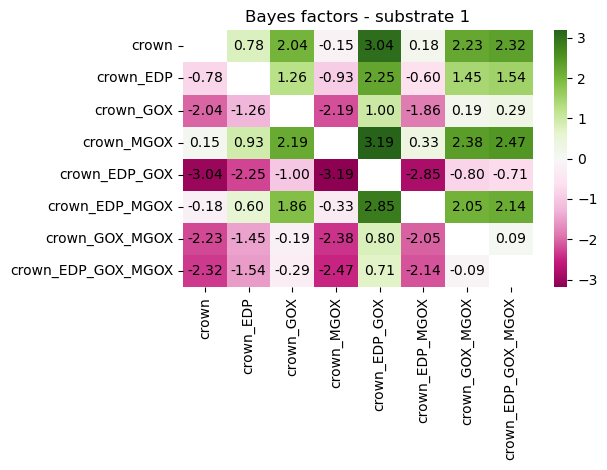

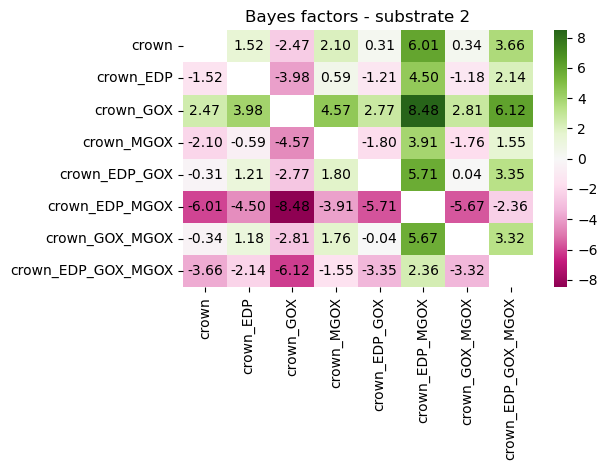

In [10]:
plot_bayes_factors(uninfo_bayes_factors, 'Bayes factors - substrate 1')
plot_bayes_factors(info_bayes_factors, 'Bayes factors - substrate 2',)

In [11]:
np.__version__

'1.26.3'

In [12]:
from matplotlib import rc
rc('text', usetex=False)

## runtime logs

### info limited bidirs
- scripts: run4_script_{1,2}.sh
- start 2023-06-11 15:29
- end 2023-06-20 11:03
- servers:
    - ibt067 run4_script_1
    - ibt069 run4_script_2

### uninfo limited bidirs
scripts: run4_script_{3,4}.sh
start 2023-06-11 15:29
end 2023-06-20 11:03
servers:
ibt071 run4_script_3
ibt073 run4_script_4

In [13]:
start_time = datetime.fromisoformat('2023-06-11 15:29')
end_time = datetime.fromisoformat('2023-06-20 11:03')

runtime = end_time - start_time
print('runtime', runtime)
print('runtime', runtime.total_seconds() / 3600, 'hours')

runtime 8 days, 19:34:00
runtime 211.56666666666666 hours


In [14]:
core_model_name = 'Core'

info_servers = {
    "crown_EDP_GOX": "ibt067",
    "crown_EDP_GOX_MGOX": "ibt067",
    "crown_EDP": "ibt067",
    "crown_EDP_MGOX": "ibt067",
    "crown_GOX": "ibt069",
    "crown_GOX_MGOX": "ibt069",
    "crown": "ibt069",
    "crown_MGOX": "ibt069",
}

uninfo_servers = {
    "crown_EDP_GOX": "ibt071",
    "crown_EDP_GOX_MGOX": "ibt071",
    "crown_EDP": "ibt071",
    "crown_EDP_MGOX": "ibt071",
    "crown_GOX": "ibt073",
    "crown_GOX_MGOX": "ibt073",
    "crown": "ibt073",
    "crown_MGOX": "ibt073",
}

server_cpus = {
    "ibt067": "Intel® Xeon® Gold 6130 @ 2.1GHz",
    # "ibt069": "Intel® Xeon® CPU E5-2683 v4 @ 2.10GHz",
    # "ibt071": "Intel® Xeon® CPU E5-2683 v4 @ 2.10GHz",
    # "ibt073": "Intel® Xeon® CPU E5-2683 v4 @ 2.10GHz",
    "ibt069": "Intel® Xeon® E5-2683 v4 @ 2.1GHz",
    "ibt071": "Intel® Xeon® E5-2683 v4 @ 2.1GHz",
    "ibt073": "Intel® Xeon® E5-2683 v4 @ 2.1GHz",
}

info_cpus = {}
uninfo_cpus = {}

for key, value in info_servers.items():
    info_cpus[key] = server_cpus[value]
for key, value in uninfo_servers.items():
    uninfo_cpus[key] = server_cpus[value]

print(info_cpus)
print(uninfo_cpus)

{'crown_EDP_GOX': 'Intel® Xeon® Gold 6130 @ 2.1GHz', 'crown_EDP_GOX_MGOX': 'Intel® Xeon® Gold 6130 @ 2.1GHz', 'crown_EDP': 'Intel® Xeon® Gold 6130 @ 2.1GHz', 'crown_EDP_MGOX': 'Intel® Xeon® Gold 6130 @ 2.1GHz', 'crown_GOX': 'Intel® Xeon® E5-2683 v4 @ 2.1GHz', 'crown_GOX_MGOX': 'Intel® Xeon® E5-2683 v4 @ 2.1GHz', 'crown': 'Intel® Xeon® E5-2683 v4 @ 2.1GHz', 'crown_MGOX': 'Intel® Xeon® E5-2683 v4 @ 2.1GHz'}
{'crown_EDP_GOX': 'Intel® Xeon® E5-2683 v4 @ 2.1GHz', 'crown_EDP_GOX_MGOX': 'Intel® Xeon® E5-2683 v4 @ 2.1GHz', 'crown_EDP': 'Intel® Xeon® E5-2683 v4 @ 2.1GHz', 'crown_EDP_MGOX': 'Intel® Xeon® E5-2683 v4 @ 2.1GHz', 'crown_GOX': 'Intel® Xeon® E5-2683 v4 @ 2.1GHz', 'crown_GOX_MGOX': 'Intel® Xeon® E5-2683 v4 @ 2.1GHz', 'crown': 'Intel® Xeon® E5-2683 v4 @ 2.1GHz', 'crown_MGOX': 'Intel® Xeon® E5-2683 v4 @ 2.1GHz'}


In [15]:
informative_base_path = Path('limited-bidir-from-server3/informative_crown_limited_bidirs/')
uninformative_base_path = Path('limited-bidir-from-server3/uninformative_crown_limited_bidirs/')
model_set_path =  Path('model_set')
# program was terminated in the middle of writing files. Cutting off the incomplete rows (1-3 rows) fixes issues in postprocessing. 
samples_dir = Path('distributed_bma_samples4-fix')
# burn in is not required for nested sampling
burn_in=0
bins = 50

In [16]:
names = {
    # "info": r"[1,2-${}^{13}$C] Glu",
    # "uninfo": r"80%[U-${}^{13}$C] + 20%[U-${}^{12}$C] Glu",
    "info": r"experiment 2",
    "uninfo": r"experiment 1",
}


In [17]:
# note: results were computed with 13CFLUX2. Warnings are comming from 13CFLUX3 which does some things differently.
# if the models are changed to fix the warnings, 13CFLUX3 will deliver the same results
info_sampler = create_bma_sampler(model_set_path=informative_base_path / model_set_path,
                             samples_output_dir=informative_base_path / samples_dir,
                             num_threads=1,
                             rng_seed=1,
                             prior_seed=1)

informative_results = info_sampler.compute_bma_posterior(burn_in=burn_in, bins=bins, num_resample_log_x=5)

uninfo_sampler = create_bma_sampler(model_set_path=uninformative_base_path / model_set_path,
                             samples_output_dir=uninformative_base_path / samples_dir,
                             num_threads=1,
                             rng_seed=1,
                             prior_seed=1)
uninformative_results = uninfo_sampler.compute_bma_posterior(burn_in=burn_in, bins=bins, num_resample_log_x=5)

created sampler for limited-bidir-from-server3/informative_crown_limited_bidirs/model_set/crown_EDP_GOX.fml
[2024-07-16 09:13:40.410029] [0x0000779681769740] [warning] Reaction "GAS2_v71" both requires and produces metabolite "CO2". This is not yet supported. Thus, the reaction is omitted from the balance equations of the metabolic pool.
Restricted license - for non-production use only - expires 2025-11-24
created sampler for limited-bidir-from-server3/informative_crown_limited_bidirs/model_set/crown_MGOX.fml
[2024-07-16 09:13:42.219429] [0x0000779681769740] [warning] Reaction "GAS2_v71" both requires and produces metabolite "CO2". This is not yet supported. Thus, the reaction is omitted from the balance equations of the metabolic pool.
created sampler for limited-bidir-from-server3/informative_crown_limited_bidirs/model_set/crown.fml
[2024-07-16 09:13:43.870693] [0x0000779681769740] [warning] Reaction "GAS2_v71" both requires and produces metabolite "CO2". This is not yet supported. T

## Get performance data

In [18]:
info_backends = {}
cwd = os.getcwd()
# print('cwd is', cwd)
try:
    for k,v in informative_results.nested_sampling_results.items():
        os.chdir(k)
        info_backends[str(Path(k).name)] = CSVBackend(os.getcwd())
        os.chdir(cwd)
    
        
    uninfo_backends = {}
    for k,v in uninformative_results.nested_sampling_results.items():
        os.chdir(k)
        uninfo_backends[str(Path(k).name)] = CSVBackend(os.getcwd())
        os.chdir(cwd)
    
finally:
    os.chdir(cwd)

In [19]:
ESS_t_info_cpu1 = []
ESS_t_info_cpu2 = []
ESS_info_cpu1 = []
ESS_info_cpu2 = []
ESS_t_uninformative_case = []
ESS_uninformative_case = []
ESS_informative_case = []
info_phase2_it = []
info_phase2_time = []
uninfo_phase2_it = []
uninfo_phase2_time = []
info_end_it = []
info_end_time = []
uninfo_end_it = []
uninfo_end_time = []

x_ticks = []

# for k, v in informative_results.nested_sampling_results.items():
for m in models:
    key = '/'.join(list(informative_results.nested_sampling_results.keys())[0].split('/')[:-1]) + '/' + m
    v = informative_results.nested_sampling_results[key]
    x_ticks.append('{'+v.name.replace('_','+').replace('crown', core_model_name)+'}')
    ESS_informative_case.append(v.ESS)
    if info_servers[v.name] == 'ibt067':
        ESS_t_info_cpu1.append(v.ESS / runtime.total_seconds())
        ESS_info_cpu1.append(v.ESS) 
    else:
        ESS_t_info_cpu2.append(v.ESS / runtime.total_seconds())
        ESS_info_cpu2.append(v.ESS)
        
    info_levels = info_backends[v.name].sample_info["level_assignment"]
    uninfo_levels = uninfo_backends[v.name].sample_info["level_assignment"]
    info_iterations = info_levels.shape[0] * 2500
    uninfo_iterations = uninfo_levels.shape[0] * 2500
    info_end_it.append(info_levels.shape[0])
    uninfo_end_it.append(uninfo_levels.shape[0])
    info_phase2_it.append(np.where(info_levels == np.max(info_levels))[0][0])
    uninfo_phase2_it.append(np.where(uninfo_levels == np.max(uninfo_levels))[0][0])
    info_end_time.append(float(info_levels.shape[0]) / runtime.total_seconds())
    uninfo_end_time.append(float(uninfo_levels.shape[0]) / runtime.total_seconds())
    info_phase2_time.append(float(np.where(info_levels == np.max(info_levels))[0][0]) / runtime.total_seconds())
    uninfo_phase2_time.append(float(np.where(uninfo_levels == np.max(uninfo_levels))[0][0]) / runtime.total_seconds())
        
for m in models:
    key = '/'.join(list(uninformative_results.nested_sampling_results.keys())[0].split('/')[:-1]) + '/' + m
    v = uninformative_results.nested_sampling_results[key]
    ESS_t_uninformative_case.append(v.ESS / runtime.total_seconds())
    ESS_uninformative_case.append(v.ESS)
        
# x_ticks[0] = r'$\mathbf{' + x_ticks[0] + r'}$ (DGP)'
# x_ticks[0] = x_ticks[0] + r' ($\mathbf{DPG}$)'
x_axis = np.arange(len(x_ticks))

In [20]:
for res in informative_results.nested_sampling_results.values():
    for param in res.posterior_samples.keys():
        print(len([_ for _ in res.posterior_samples.keys() if 'activation' not in _  and _.endswith('.n')]))
        print(len([_ for _ in res.posterior_samples.keys() if 'activation' not in _  and _.endswith('.x')]))

9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26
9
26


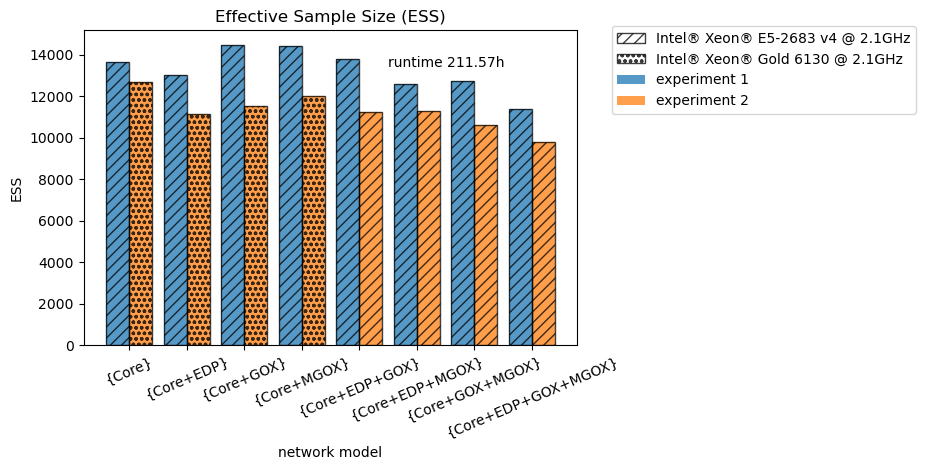

In [21]:
scale = 1 
a = 0.75
n_subfigs = 1

ESS_title = 'Effective Sample Size (ESS)'
y_labels = [
    'ESS',
    'ESS/t [1/s]',
]

scale = 1
fig, ax_ess = plt.subplots(figsize=(scale*6.4, scale*4.8))

plt.title(ESS_title)
# ibt071 and ibt073 are same cpu
ax_ess.bar(x_axis-0.2,ESS_uninformative_case, 0.4,  color='C0', alpha=a)
ax_ess.bar(x_axis[:4]+0.2,ESS_info_cpu1, 0.4, color='C1', alpha=a)
ax_ess.bar(x_axis[4:]+0.2,ESS_info_cpu2, 0.4, color='C1', alpha=a)
bar1 = ax_ess.bar(x_axis-0.2,ESS_uninformative_case, 0.4,  fill=False, label=server_cpus['ibt071'], color='C0', hatch='///', alpha=a)
bar2 = ax_ess.bar(x_axis[:4]+0.2,ESS_info_cpu1, 0.4, fill=False, label=server_cpus['ibt067'], color='C1', hatch='ooo', alpha=a)
ax_ess.bar(x_axis[4:]+0.2,ESS_info_cpu2, 0.4, fill=False, color='C1', hatch='///', alpha=a)
ax_ess.set_xticks(x_axis, x_ticks, rotation=23)
ax_ess.set_xlabel('network model')
ax_ess.set_ylabel(y_labels[0])
# ax_ess.set_xlabel("network model")
ax_ess.text(4.5, 13400, f'runtime {"%.2f" % (runtime.total_seconds()/3600)}h')

# ax_ess_t = ax_ess.twinx()
# ax_ess_t.bar(x_axis+0.2,ESS_t_uninformative_case, 0.4,  color='C1', alpha=a)
# ax_ess_t.bar(x_axis[:4]-0.2,ESS_t_info_cpu1, 0.4, color='C0', alpha=a)
# ax_ess_t.bar(x_axis[4:]-0.2,ESS_t_info_cpu2, 0.4, color='C0', alpha=a)
# bar1 = ax_ess_t.bar(x_axis+0.2,ESS_t_uninformative_case, 0.4,  fill=False, label=server_cpus['ibt071'], color='C1', hatch='///', alpha=a)
# bar2 = ax_ess_t.bar(x_axis[:4]-0.2,ESS_t_info_cpu1, 0.4, fill=False, label=server_cpus['ibt067'], color='C0', hatch='ooo', alpha=a)
# ax_ess_t.bar(x_axis[4:]-0.2,ESS_t_info_cpu2, 0.4, fill=False, color='C0', hatch='///', alpha=a)
# ax_ess_t.yaxis.set_label_position("right")
# ax_ess_t.yaxis.tick_right()
# ax_ess_t.set_ylabel(y_labels[1])

extra1 = Rectangle((0, 0), 1, 1, fc="C1", fill=True, edgecolor='none', linewidth=0, alpha=a)
extra2 = Rectangle((0, 0), 1, 1, fc="C0", fill=True, edgecolor='none', linewidth=0, alpha=a)
leg = fig.legend([bar1,bar2, extra2,extra1], [server_cpus['ibt071'], server_cpus['ibt067'], names['uninfo'], names['info']], ncol=1,
          bbox_to_anchor=(1.45, 0.95),
)

fig.tight_layout()
plt.savefig('ESS_overview.svg', format='svg', bbox_inches='tight', bbox_extra_artists=(leg,))
plt.savefig('ESS_overview.pdf', format='pdf', bbox_inches='tight', bbox_extra_artists=(leg,))
plt.savefig('ESS_overview.png', format='png', bbox_inches='tight', bbox_extra_artists=(leg,))
plt.show()

In [22]:
color_bar_2 = 'C0'
color_bar_1 = 'C1'
color_line_2 = '#E78AC3'
color_line_1 = '#66C2A5'

In [23]:
# [float(s)/e for s in info_end_it for e in info_phase2_it]

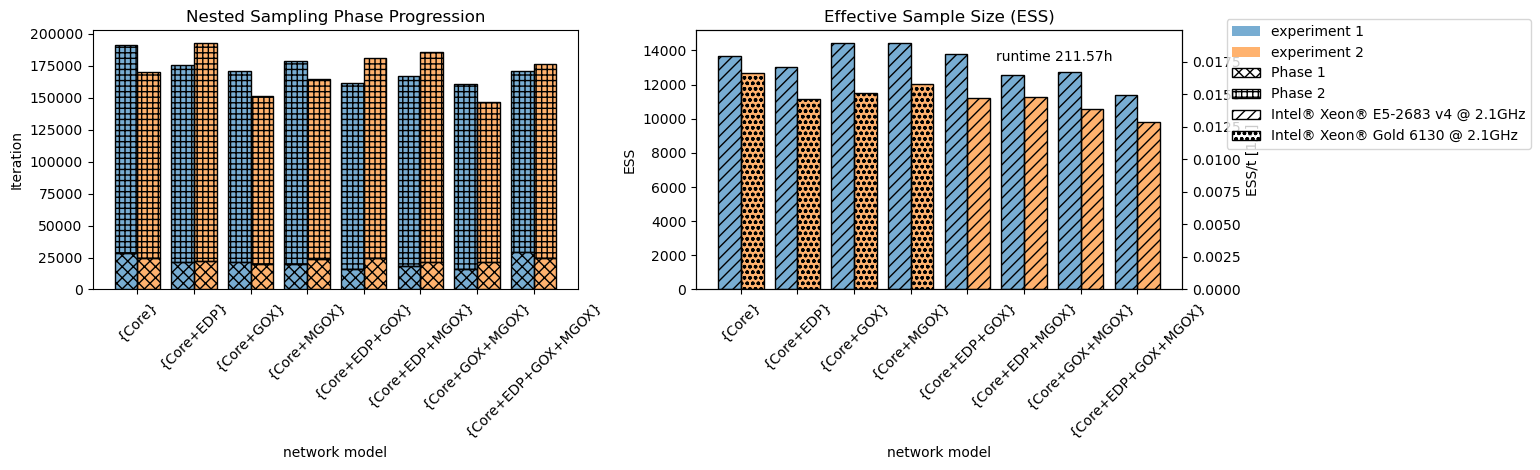

In [24]:
scale = 1 
a = 0.6
n_subfigs = 2

ESS_title = 'Effective Sample Size (ESS)'
it_title = 'Nested Sampling Phase Progression'
y_labels = [
    'ESS',
    'ESS/t [1/s]',
]

fig, axs = plt.subplots(nrows=1, ncols=n_subfigs, figsize=(n_subfigs*scale*6.4, scale*4.8), sharex=True)

# plt.suptitle('Performance overview', y=1.05)

ax_it=axs[0]
ax_it.set_title(it_title)

ax_it.bar(x_axis+0.2,info_end_it, 0.4, color=color_bar_1, alpha=a, bottom=info_phase2_it)
ax_it.bar(x_axis-0.2,uninfo_end_it, 0.4,  color=color_bar_2, alpha=a, bottom=uninfo_phase2_it)
ax_it.bar(x_axis+0.2,info_phase2_it, 0.4, color=color_bar_1, alpha=a)
ax_it.bar(x_axis-0.2,uninfo_phase2_it, 0.4,  color=color_bar_2, alpha=a)

phase2 = ax_it.bar(x_axis+0.2,info_end_it, 0.4, color=color_bar_1, alpha=1, bottom=info_phase2_it, fill=False, hatch='+++', label='Phase 2',)
ax_it.bar(x_axis-0.2,uninfo_end_it, 0.4,  color=color_bar_2, alpha=1, bottom=uninfo_phase2_it, fill=False, hatch="+++")
phase1 = ax_it.bar(x_axis+0.2,info_phase2_it, 0.4, color=color_bar_1, alpha=1, fill=False, hatch="xxx", label='Phase 1',)
ax_it.bar(x_axis-0.2,uninfo_phase2_it, 0.4,  color=color_bar_2, alpha=1, fill=False, hatch="xxx")
ax_it.set_ylabel('Iteration')
ax_it.set_xticks(x_axis, x_ticks, rotation=45)
ax_it.set_xlabel("network model")



# start ess plot
ax_ess=axs[1]
ax_ess.set_title(ESS_title)
# ibt071 and ibt073 are same cpu
ax_ess.bar(x_axis-0.2,ESS_uninformative_case, 0.4,  color=color_bar_2, alpha=a)
ax_ess.bar(x_axis[:4]+0.2,ESS_info_cpu1, 0.4, color=color_bar_1, alpha=a)
ax_ess.bar(x_axis[4:]+0.2,ESS_info_cpu2, 0.4, color=color_bar_1, alpha=a)
bar1 = ax_ess.bar(x_axis-0.2,ESS_uninformative_case, 0.4,  fill=False, label=server_cpus['ibt071'], color=color_bar_2, hatch='///')
bar2 = ax_ess.bar(x_axis[:4]+0.2,ESS_info_cpu1, 0.4, fill=False, label=server_cpus['ibt067'], color=color_bar_1, hatch='ooo')
ax_ess.bar(x_axis[4:]+0.2,ESS_info_cpu2, 0.4, fill=False, color=color_bar_1, hatch='///')
ax_ess.set_xticks(x_axis, x_ticks, rotation=45)
ax_ess.set_ylabel(y_labels[0])
ax_ess.set_xlabel("network model")
ax_ess.text(4.5, 13400, f'runtime {"%.2f" % (runtime.total_seconds()/3600)}h')

ax_ess_t = ax_ess.twinx()
ax_ess_t.bar(x_axis-0.2,ESS_t_uninformative_case, 0.4,  color=color_bar_2, alpha=0)
ax_ess_t.bar(x_axis[:4]+0.2,ESS_t_info_cpu1, 0.4, color=color_bar_1, alpha=0)
ax_ess_t.bar(x_axis[4:]+0.2,ESS_t_info_cpu2, 0.4, color=color_bar_1, alpha=0)
# bar1 = ax_ess_t.bar(x_axis+0.2,ESS_t_uninformative_case, 0.4,  fill=False, label=server_cpus['ibt071'], color=color_bar_2, hatch='///', alpha=a)
# bar2 = ax_ess_t.bar(x_axis[:4]-0.2,ESS_t_info_cpu1, 0.4, fill=False, label=server_cpus['ibt067'], color=color_bar_1, hatch='ooo', alpha=a)
# ax_ess_t.bar(x_axis[4:]-0.2,ESS_t_info_cpu2, 0.4, fill=False, color=color_bar_1, hatch='///', alpha=a)
ax_ess_t.yaxis.set_label_position("right")
ax_ess_t.yaxis.tick_right()
ax_ess_t.set_ylabel(y_labels[1])

extra1 = Rectangle((0, 0), 1, 1, fc=color_bar_1, fill=True, edgecolor='none', linewidth=0, alpha=a)
extra2 = Rectangle((0, 0), 1, 1, fc=color_bar_2, fill=True, edgecolor='none', linewidth=0, alpha=a)
leg = fig.legend([extra2, extra1, phase1, phase2, bar1, bar2], 
                 [  
                     names['uninfo'],
                     names['info'],
                     'Phase 1',
                     'Phase 2',
                     server_cpus['ibt071'],
                     server_cpus['ibt067'], 
                 ],
                 ncol=1,
          bbox_to_anchor=(1.2, 0.95),
          borderaxespad=0.,
)


fig.align_labels(axs)

fig.tight_layout()
plt.savefig('performance_overview.svg', format='svg', bbox_inches='tight', bbox_extra_artists=(leg,))
plt.savefig('performance_overview.pdf', format='pdf', bbox_inches='tight', bbox_extra_artists=(leg,))
plt.savefig('performance_overview.png', format='png', bbox_inches='tight', bbox_extra_artists=(leg,))
plt.show()

# Fig 1: Posterior & Model weight results

In [25]:
# fluxes part of all models (for better comparibility)handles, labels = ax.get_legend_handles_labels():
fluxes = [
    # net
    "ANA3_v33.n", "ATPH1_v64.n", "EMP8_v8.n", "TCA1_v20.n", "TH1_v63.n", "mu2_v70.n",
    # xch
     "AA8_v44.x", "AA9_v45.x", "AC1_v35.x", "EMP2_v2.x", "EMP4_v4.x", "EMP5_v5.x", "EMP6_v6.x", "EMP7_v7.x", "EMP8_v8.x", "PPP3_v11.x", "PPP4_v12.x", "PPP5_v13.x", "PPP6_v14.x", "PPP7_v15.x", "PPP8_v16.x", "PPP9_v17.x", "TCA3_v22.x", "TCA4_v23.x", "TCA6_v25___1.x", "TCA7_v26___1.x", "TCA8_v27___1.x", "TCA9_v28.x", "TH1_v63.x", 
]

network_names = []
info_model_probs = {}
uninfo_model_probs = {} 
for k, v in informative_results.model_weights.items():
    network_names.append(k.replace('_', '+').replace('crown', core_model_name))
    info_model_probs[network_names[-1]] = v
    uninfo_model_probs[network_names[-1]] = uninformative_results.model_weights[k]

# sort names to put models with GOX next to each other
network_names = [
    core_model_name + '+EDP+GOX+MGOX', 
    core_model_name + '+EDP+GOX', 
    core_model_name + '+GOX+MGOX', 
    core_model_name + '+GOX',
    core_model_name + '+EDP',
    core_model_name + '+EDP+MGOX', 
    core_model_name, 
    core_model_name + '+MGOX', 
]

info_model_probs = [info_model_probs[n] for n in network_names]
uninfo_model_probs = [uninfo_model_probs[n] for n in network_names]
print(network_names)
print(info_model_probs)
print(uninfo_model_probs)

['Core+EDP+GOX+MGOX', 'Core+EDP+GOX', 'Core+GOX+MGOX', 'Core+GOX', 'Core+EDP', 'Core+EDP+MGOX', 'Core', 'Core+MGOX']
[0.0017684626576593425, 0.05056376298944356, 0.04877786409052084, 0.8067629286332926, 0.015026044199165244, 0.00016814239269026532, 0.06856341392825213, 0.008369381108976259]
[0.025551136922700064, 0.01253607795676876, 0.02804252047893219, 0.03399174055350124, 0.1189692266149904, 0.217057848986404, 0.2607834951400801, 0.30306795334662323]


In [26]:
print(models)

['crown', 'crown_EDP', 'crown_GOX', 'crown_MGOX', 'crown_EDP_GOX', 'crown_EDP_MGOX', 'crown_GOX_MGOX', 'crown_EDP_GOX_MGOX']


In [27]:
print(info_model_probs)
print(uninfo_model_probs)

for i in range(len(info_model_probs)):
    if info_model_probs[i] < 0.05 and uninfo_model_probs[i] < 0.05:
        print(network_names[i], 'has low prob in both cases')

[0.0017684626576593425, 0.05056376298944356, 0.04877786409052084, 0.8067629286332926, 0.015026044199165244, 0.00016814239269026532, 0.06856341392825213, 0.008369381108976259]
[0.025551136922700064, 0.01253607795676876, 0.02804252047893219, 0.03399174055350124, 0.1189692266149904, 0.217057848986404, 0.2607834951400801, 0.30306795334662323]
Core+EDP+GOX+MGOX has low prob in both cases
Core+GOX+MGOX has low prob in both cases


In [28]:
def plot_model_probs(ax, fs, network_names):
    w = 0.1

    ax.set_title('Network Inference', fontsize=fs)
    info_bottom = 0 
    uninfo_bottom = 0 
    for i, network_name in enumerate(network_names):
        if i!=0:
            info_bottom += info_model_probs[i-1]
            uninfo_bottom += uninfo_model_probs[i-1]
        j=i
        label = network_name
        # if network_name == core_model_name+"+EDP+GOX":
            # label = network_name + r' ($\mathbf{DGP}$)'
        ax.bar(
            names['uninfo'], 
            uninfo_model_probs[i], width=w, alpha=a,  color=f'C{j}', bottom=uninfo_bottom, 
               label=label
              )
        label = None
        ax.bar(names['info'], info_model_probs[i], width=w, alpha=a,  color=f'C{j}', bottom=info_bottom)
        
    info_bottom = 0 
    uninfo_bottom = 0 
    for i, network_name in enumerate(network_names):
        if i!=0:
            info_bottom += info_model_probs[i-1]
            uninfo_bottom += uninfo_model_probs[i-1]
        j=i
        if network_name == core_model_name+"+GOX":
            label = "w/ GOX"
        if network_name == core_model_name+"+EDP":
            label = "w/ EDP"
        # if network_name == core_model_name+"+EDP+GOX":
        #     label = "w/ EDP & GOX"
        hatches = None
        if '+GOX' in network_name:
            hatches = '||||'
        elif '+EDP' in network_name:
            hatches = '----'
        else:
            hatches = ''
            
        if '+GOX' in network_name and '+EDP' in network_name:
            hatches = '++++'
            
        ax.bar(names['uninfo'], uninfo_model_probs[i], width=w, fill=False, hatch=hatches,edgecolor='k', color=f'C{j}', bottom=uninfo_bottom, linewidth=2,
               label=label
              )
        ax.bar(names['info'], info_model_probs[i], width=w, fill=False, hatch=hatches, edgecolor='k', color=f'C{j}', bottom=info_bottom, linewidth=2)
        label = None
    
    uninfo_gox = 100*sum([uninfo_model_probs[i] for i,n in enumerate(network_names) if "+GOX" in n])
    info_gox = 100*sum([info_model_probs[i] for i,n in enumerate(network_names) if "+GOX" in n])
    uninfo_edp = 100*sum([uninfo_model_probs[i] for i,n in enumerate(network_names) if "+EDP" in n])
    info_edp = 100*sum([info_model_probs[i] for i,n in enumerate(network_names) if "+EDP" in n])
    ax.text(0.2, 0.03, r'$\Sigma$w/ GOX' + f'={"%.2f" % uninfo_gox}%', ha='left', rotation=90,fontsize=12)
    ax.text(0.85, 0.03, r'$\Sigma$w/ GOX' + f'={"%.2f" % info_gox}%', ha='left', rotation=90,fontsize=12)
    ax.text(0.1, 0.03, r'$\Sigma$w/ EDP' + f'={"%.2f" % uninfo_edp}%', ha='left', rotation=90,fontsize=12)
    ax.text(0.75, 0.03, r'$\Sigma$w/ EDP' + f'={"%.2f" % info_edp}%', ha='left', rotation=90,fontsize=12)
    ax.set_ylabel('relative evidence', fontsize=16)
    ax.set_xlabel('data', fontsize=16, rotation=0)
    ax.tick_params(axis='y', which='major', labelsize=12)
    ax.tick_params(axis='x', which='major', labelsize=12)
    return ax.legend(bbox_to_anchor=(1.05, 1))

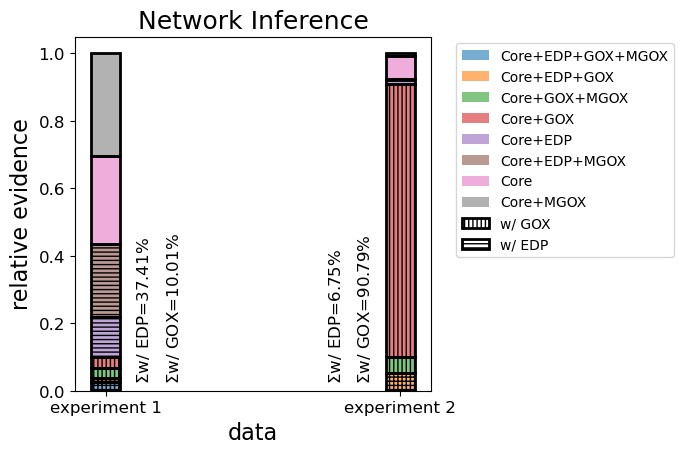

In [29]:
fig, axs = plt.subplots(figsize=(4.6,4.6))
ax = axs
plot_model_probs(ax, fs=18, network_names=network_names)
plt.savefig('model_probabilities.svg', format='svg', bbox_inches='tight')
plt.savefig('model_probabilities.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [30]:
# True values are only known in synthetic cases, such as this demo
true_vals = {
 }

with open('crow_true_vals.txt', 'r') as f:
    for line in f.readlines():
        line = line.strip()
        flux_name = line.split(':')[0]
        net_val = float(line.split('net=')[1].split('(')[0])
        xch_val = float(line.split('xch=')[1].split('(')[0])
        true_vals[flux_name + '.n'] = net_val
        true_vals[flux_name + '.n_activation'] = 1 if net_val !=0 else 0
        true_vals[flux_name + '.x'] = xch_val
        true_vals[flux_name + '.x_activation'] = 1 if xch_val !=0 else 0

print('number of fluxes in true model', len(true_vals.keys()))

number of fluxes in true model 476


In [31]:
print(fluxes)
net_fluxes = [f for f in fluxes if f.endswith('.n')]

['ANA3_v33.n', 'ATPH1_v64.n', 'EMP8_v8.n', 'TCA1_v20.n', 'TH1_v63.n', 'mu2_v70.n', 'AA8_v44.x', 'AA9_v45.x', 'AC1_v35.x', 'EMP2_v2.x', 'EMP4_v4.x', 'EMP5_v5.x', 'EMP6_v6.x', 'EMP7_v7.x', 'EMP8_v8.x', 'PPP3_v11.x', 'PPP4_v12.x', 'PPP5_v13.x', 'PPP6_v14.x', 'PPP7_v15.x', 'PPP8_v16.x', 'PPP9_v17.x', 'TCA3_v22.x', 'TCA4_v23.x', 'TCA6_v25___1.x', 'TCA7_v26___1.x', 'TCA8_v27___1.x', 'TCA9_v28.x', 'TH1_v63.x']


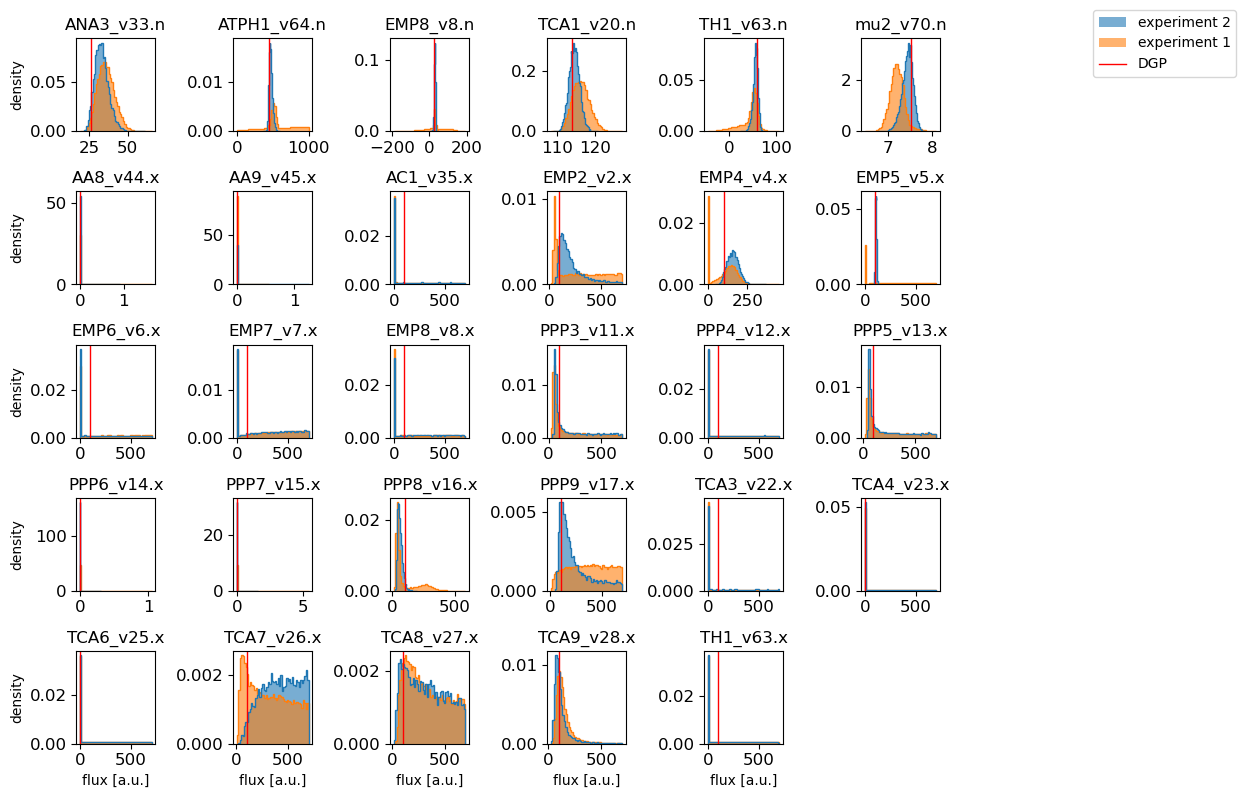

In [32]:
BMA_informative = informative_results.bma_posterior_histograms
BMA_uninformative = uninformative_results.bma_posterior_histograms
bins_informative = informative_results.bin_edges
bins_uninformative = uninformative_results.bin_edges

rows = 5
cols = 6
fig, axs = plt.subplots(nrows=rows, ncols=cols, sharex=False, sharey=False)
# plt.suptitle('BMA posteriors', fontsize=24, y=1.01)
fig.set_figheight(rows*1.6)
fig.set_figwidth(cols*1.6)

axs = axs.flatten()

ax = axs[0]

# plot_model_probs(ax, fs=20)

for i, c in enumerate(fluxes):
    # i+=1
    axs[i].set_title(c.replace('___1', ''))
    
    axs[i].hist(bins_informative[c][:-1], bins=bins_informative[c], alpha=a, weights=BMA_informative[c], density=True, linewidth=1, color='C0',
                label=f'{names["info"]}' if i==1 else None,
               )
    axs[i].hist(bins_uninformative[c][:-1], bins=bins_uninformative[c], alpha=a, weights=BMA_uninformative[c], density=True, linewidth=1, color='C1',
                label=f'{names["uninfo"]}' if i==1 else None,
               )
    axs[i].hist(bins_uninformative[c][:-1], bins=bins_uninformative[c], histtype='step', weights=BMA_uninformative[c], density=True,  linewidth=1, color='C1')
    axs[i].hist(bins_informative[c][:-1], bins=bins_informative[c], histtype='step', weights=BMA_informative[c], density=True,  linewidth=1, color='C0')
    
    try:
        axs[i].axvline(true_vals[c], label='DGP' if i==1 else None, c='r', linewidth=1)
    except:
        axs[i].axvline(0, label='DPG value' if i==1 else None, c='g', linewidth=1)
    if i % cols == 0:
        axs[i].set_ylabel('density')
    if i > 23:
        axs[i].set_xlabel('flux [a.u.]')
    axs[i].tick_params(axis='both', which='major', labelsize=12)

axs[len(fluxes)].set_axis_off()
    
# axs[len(fluxes)].axis('off')
handles, labels = axs[1].get_legend_handles_labels()
leg = plt.figlegend(handles, labels, loc='upper right', bbox_to_anchor=(1.3, 1.00))

fig.align_labels(axs)
plt.tight_layout()
plt.savefig('presentation_posterior.png', format='png', bbox_inches='tight', bbox_extra_artists=(leg,))
plt.savefig('presentation_posterior.pdf', format='pdf', bbox_inches='tight', bbox_extra_artists=(leg,))
plt.savefig('presentation_posterior.svg', format='svg', bbox_inches='tight', bbox_extra_artists=(leg,))
plt.show()

In [33]:
informative_hists = []
for m in models:
    informative_hists.append(informative_results.single_model_posterior_histograms[m])
uninformative_hists = []
for m in models:
    uninformative_hists.append(uninformative_results.single_model_posterior_histograms[m])

In [34]:
print(len(net_fluxes))
print(network_names)
print(info_model_probs)

6
['Core+EDP+GOX+MGOX', 'Core+EDP+GOX', 'Core+GOX+MGOX', 'Core+GOX', 'Core+EDP', 'Core+EDP+MGOX', 'Core', 'Core+MGOX']
[0.0017684626576593425, 0.05056376298944356, 0.04877786409052084, 0.8067629286332926, 0.015026044199165244, 0.00016814239269026532, 0.06856341392825213, 0.008369381108976259]


# 

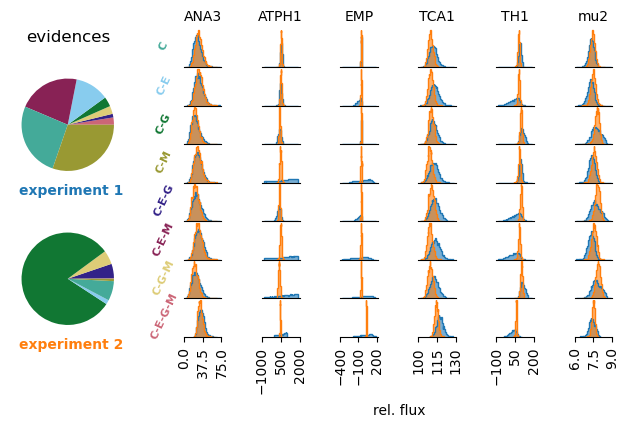

In [35]:
x_ticks2 = ['-'.join([_[0] for _ in x[1:-1].split('+')]) for x in x_ticks]
gs = (gridspec.GridSpec(8,len(net_fluxes)+1,width_ratios=[4,1,1,1,1,1,1]))
gs.update(hspace= -0.0, wspace=0.75)
fig = plt.figure(figsize=(8,4))

uninfo_ax = fig.add_subplot(gs[1:4,0])
info_ax = fig.add_subplot(gs[5:,0])
uninfo_ax.set_axis_off()
info_ax.set_axis_off()

labels = ["-".join([_[0] for _ in n.split('+')]) for n in network_names]
colors = [
'#CC6677',
'#332288',
'#DDCC77',
'#117733',
'#88CCEE',
'#882255',
'#44AA99',
'#999933',
]
uninfo_ax.pie(uninfo_model_probs, labels=None, colors=colors)
uninfo_ax.set_title('evidences\n', fontsize=12, y=1)
uninfo_ax.text(-1.05, -1.5, names['uninfo'], fontsize=10, color='#1f77b4', fontdict={'fontweight': 'bold'})


info_ax.pie(info_model_probs, labels=None, colors=colors)
info_ax.text(-1.05, -1.5, names['info'], fontsize=10, color='#ff7f0e', fontdict={'fontweight': 'bold'})
# info_ax.set_title('evidences.\n' + names['info'], fontsize=10, y=1, color='#ff7f0e', fontdict={'fontweight': 'bold'})

for j, c in enumerate(net_fluxes):
    flux_axes = []
    for i, m in enumerate(models):
        f_ax = fig.add_subplot(gs[i:i+1,j+1:j+2])
        if i == 0:
            f_ax.set_title(c[:-6], fontsize=10)
        flux_axes.append(f_ax)
        f_ax.hist(bins_uninformative[c][:-1], bins=bins_uninformative[c], alpha=a, weights=uninformative_hists[i][c], density=True, linewidth=1, label=f'{names["uninfo"]}' if i==1 else None,
                    color=f'C{0}')
        f_ax.hist(bins_uninformative[c][:-1], bins=bins_uninformative[c], histtype='step', weights=uninformative_hists[i][c], density=True, linewidth=1, label=f'{names["uninfo"]}' if i==1 else None,
                    color=f'C{0}')
        f_ax.hist(bins_informative[c][:-1], bins=bins_informative[c], alpha=a, weights=informative_hists[i][c], density=True, linewidth=1, label=f'{names["uninfo"]}' if i==1 else None,
                    color=f'C{1}')
        f_ax.hist(bins_informative[c][:-1], bins=bins_informative[c], histtype='step', weights=informative_hists[i][c], density=True, linewidth=1, label=f'{names["uninfo"]}' if i==1 else None,
                    color=f'C{1}')
        y_min, y_max = f_ax.get_ylim()
            
        rect = f_ax.patch
        rect.set_alpha(0)
        f_ax.set_yticklabels([])
        if j==0: 
            f_ax.set_ylabel(x_ticks2[i], fontsize=8, rotation=65, color=colors[labels.index(x_ticks2[i])], fontdict={"fontweight": 'bold'})
        
        if i == len(models)-1:
            _xticks = f_ax.get_xticks()
            _xticks = [_xticks[0], (_xticks[1] + _xticks[2]) / 2, _xticks[3]]
            f_ax.set_xticks(_xticks)
            f_ax.set_xticklabels(f_ax.get_xticklabels(), rotation=90)
        else:
            f_ax.set_xticklabels([])
            f_ax.xaxis.set_ticks_position('none')
        f_ax.yaxis.set_ticks_position('none')
            
        # spines = ["top","right","left","bottom"]
        spines = ["top","right","left"]
        
        for s in spines:
            f_ax.spines[s].set_visible(False)


f_ax.text(-10, -7.5, 'rel. flux')

fig.align_xlabels()
fig.align_ylabels()
# plt.tight_layout()
plt.savefig('inference_results.pdf', format='pdf', bbox_inches='tight') # , bbox_extra_artists=(leg,))
plt.show()

## Level assignments

In [36]:
info_names = []
uninfo_names = []

info_compression = []
info_mh_acceptance = []
info_levels = []
info_log_X = []
info_log_L = []
info_post_weight = []
info_post_weight_log_L = []

uninfo_compression = []
uninfo_mh_acceptance = []
uninfo_levels = []
uninfo_log_X = []
uninfo_log_L = []
uninfo_post_weight = []
uninfo_post_weight_log_L = []

post_weight_thinning = 100

for i, k in enumerate(info_backends.keys()):
    info_names.append(k.replace('_','+').replace('crown', core_model_name))
    levels = info_backends[k].levels
    info_levels.append(levels)
    info_compression.append(np.diff(levels["log_X"]))
    m = levels["tries"] > 0
    info_mh_acceptance.append(levels[m]["accepts"]/levels[m]["tries"])

    log_X = info_backends[k].sample_log_X
    sample_info = info_backends[k].sample_info
    weights = info_backends[k].weights
    info_log_X.append(log_X)
    info_log_L.append(sample_info["log_likelihood"])
    print(weights[::post_weight_thinning].shape)
    info_post_weight.append(weights[::post_weight_thinning,])
    info_post_weight_log_L.append(log_X[::post_weight_thinning,])
    
for i, k in enumerate(info_backends.keys()):
    uninfo_names.append(k.replace('_','+').replace('crown', core_model_name))
    levels = uninfo_backends[k].levels
    uninfo_levels.append(levels)
    uninfo_compression.append(np.diff(levels["log_X"]))
    m = levels["tries"] > 0
    uninfo_mh_acceptance.append(levels[m]["accepts"]/levels[m]["tries"])

    log_X = uninfo_backends[k].sample_log_X
    sample_info = uninfo_backends[k].sample_info
    weights = uninfo_backends[k].weights
    uninfo_log_X.append(log_X)
    uninfo_log_L.append(sample_info["log_likelihood"])
    print(weights[::post_weight_thinning].shape)
    uninfo_post_weight.append(weights[::post_weight_thinning,])
    uninfo_post_weight_log_L.append(log_X[::post_weight_thinning,])

a2 = 0.5 
color_uninfo = 'C0'
color_info = 'C1'

(1563, 1)
(1407, 1)
(1456, 1)
(1313, 1)
(1254, 1)
(1641, 1)
(1516, 1)
(1709, 1)
(1461, 1)
(1588, 1)
(1627, 1)
(1494, 1)
(1448, 1)
(1484, 1)
(1417, 1)
(1540, 1)


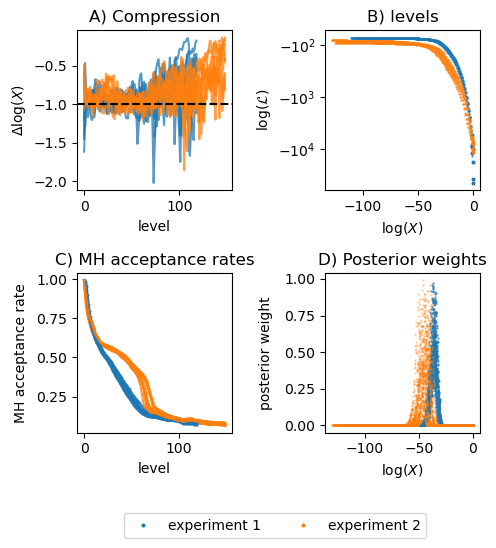

In [37]:
rows = 2
cols = 2
fig, axs = plt.subplots(nrows=rows, ncols=cols, sharex=False, sharey=False)
# plt.suptitle(f'Nested Samling Diagnostics', y=1.0)
fig.set_figheight(rows*2.5)
fig.set_figwidth(cols*2.5)

a2=0.75
ms = 1.25


axs = axs.flatten()

ax = axs[0]
ax.set_title("A) Compression")
ax.set_xlabel("level")
ax.set_ylabel(r"$\Delta\log(X)$")
for i in range(len(uninfo_names)):
    ax.plot(np.diff(uninfo_levels[i]["log_X"]), alpha=a2, color=color_uninfo, markersize=ms)
for i in range(len(info_names)):
    ax.plot(np.diff(info_levels[i]["log_X"]), alpha=a2, color=color_info, markersize=ms)
ax.axhline(-1., color="k", linestyle='--')

ax = axs[2]
ax.set_xlabel("level")
ax.set_ylabel("MH acceptance rate")
ax.set_title("C) MH acceptance rates")
for i in range(len(info_names)):
    ax.plot(uninfo_mh_acceptance[i], ".-", alpha=a2, color=color_uninfo, markersize=ms)
    ax.plot(info_mh_acceptance[i], ".-", alpha=a2, color=color_info, markersize=ms)
    
ax = axs[1]
ax.set_ylabel(r"$\log(\mathcal{L})$")
# ax.set_ylabel("log(\mathcal{L})")
ax.set_xlabel(r"$\log(X)$")
ax.set_title("B) levels")
for i in range(len(uninfo_names)):
    l = names['uninfo'].replace(" + ", "+\n") if i == 0 else None
    ax.plot(uninfo_levels[i]['log_X'][1:2], uninfo_levels[i]['log_likelihood'][1:2], '.', label=l, color=color_uninfo, markersize=3*ms)
    ax.plot(uninfo_levels[i]['log_X'][1:], uninfo_levels[i]['log_likelihood'][1:], '.', alpha=a2, color=color_uninfo, markersize=ms)
for i in range(len(info_names)):
    l = names['info'] if i ==0 else None
    ax.plot(info_levels[i]['log_X'][1:2], info_levels[i]['log_likelihood'][1:2], '.', label=l, color=color_info, markersize=3*ms)
    ax.plot(info_levels[i]['log_X'][1:], info_levels[i]['log_likelihood'][1:], '.', alpha=a2, color=color_info, markersize=ms)
ax.set_yscale('symlog')
# ax.legend()
    
ax = axs[3]
ax.set_title("D) Posterior weights")
ax.set_ylabel("posterior weight")
ax.set_xlabel(r"$\log(X)$")
for i in range(len(uninfo_names)):
    ax.plot(uninfo_post_weight_log_L[i], uninfo_post_weight[i], '.', alpha=a2, color=color_uninfo, markersize=ms)
for i in range(len(info_names)):
    ax.plot(info_post_weight_log_L[i], info_post_weight[i], '.', alpha=a2*0.5, color=color_info, markersize=ms)
    
handles, labels = axs[1].get_legend_handles_labels()
leg = plt.figlegend(handles, labels, loc='lower center', bbox_to_anchor=(0.56, -0.1), ncols=2)

fig.align_labels(axs)
plt.tight_layout()
plt.savefig('diagnostics.png', format='png', bbox_inches='tight', bbox_extra_artists=(leg,))
plt.savefig('diagnostics.pdf', format='pdf', bbox_inches='tight', bbox_extra_artists=(leg,))
plt.savefig('diagnostics.svg', format='svg', bbox_inches='tight', bbox_extra_artists=(leg,))
plt.show()

In [38]:
info_H = []
info_H_err = []
info_Z = [] 
info_Z_err = []
for m in models:
    key = '/'.join(list(informative_results.nested_sampling_results.keys())[0].split('/')[:-1]) + '/' + m
    v = informative_results.nested_sampling_results[key]
    info_H.append(v.H_estimate)
    info_Z.append(v.logz_estimate)
    info_H_err.append(v.H_error)
    info_Z_err.append(v.logz_error)

uninfo_H = []
uninfo_H_err = []
uninfo_Z = [] 
uninfo_Z_err = []
for m in reversed(models):
    key = '/'.join(list(uninformative_results.nested_sampling_results.keys())[0].split('/')[:-1]) + '/' + m
    v = uninformative_results.nested_sampling_results[key]
    uninfo_H.append(v.H_estimate)
    uninfo_Z.append(v.logz_estimate)
    uninfo_H_err.append(v.H_error)
    uninfo_Z_err.append(v.logz_error)

In [39]:
print(models)
print(np.round(uninfo_Z_err, decimals=4))
print(np.round(uninfo_Z, decimals=2))
print(np.round(uninfo_H_err, decimals=4))
print(np.round(uninfo_H, decimals=2))

['crown', 'crown_EDP', 'crown_GOX', 'crown_MGOX', 'crown_EDP_GOX', 'crown_EDP_MGOX', 'crown_GOX_MGOX', 'crown_EDP_GOX_MGOX']
[0.0016 0.0018 0.0023 0.0019 0.0024 0.0014 0.0013 0.003 ]
[-116.05 -115.95 -113.91 -116.76 -113.57 -115.76 -114.51 -113.72]
[0.0063 0.004  0.0046 0.0051 0.004  0.0039 0.0034 0.0058]
[35.47 35.44 33.65 36.06 33.37 35.16 33.88 33.3 ]


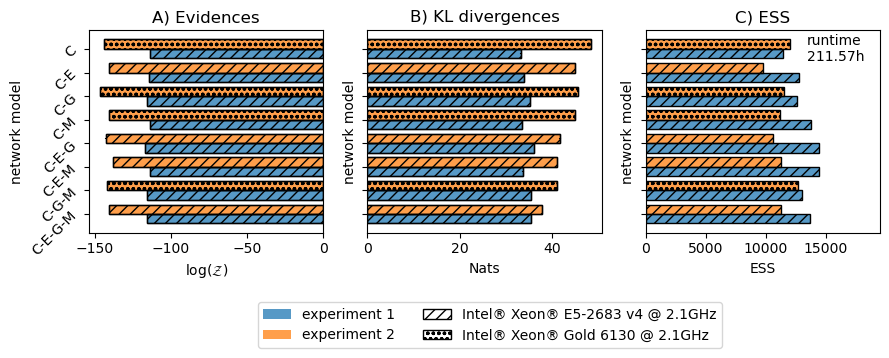

In [40]:
# # ax=axs[0]
# # ax.set_title(r"Model inferences")
# # ax.set_ylabel(r"$\log(\mathcal{Z})$")
# # ax.bar(x_vals-0.2, info_log_Z.values(), 0.4, alpha=a) 
# # ax.bar(x_vals+0.2, uninfo_log_Z.values(), 0.4, alpha=a) 

x_ticks2 = ['-'.join([_[0] for _ in x[1:-1].split('+')]) for x in x_ticks]
a = 0.75

rows = 1
cols = 3
fig, axs = plt.subplots(nrows=rows, ncols=cols, sharex=False, sharey=True)
# plt.suptitle(f'Nested Samling Diagnostics', y=1.0)
fig.set_figheight(rows*3)
fig.set_figwidth(cols*3)

axs = axs.flatten()


ax = axs[0]
ax.set_title("A) Evidences")
ax.barh(x_vals-0.2, uninfo_Z, yerr=uninfo_Z_err, height=0.4, alpha=a, label=names['uninfo'], edgecolor='k') 
ax.barh(x_vals+0.2, info_Z, yerr=info_Z_err, height=0.4, alpha=a, label=names['info'], edgecolor='k') 
ax.barh(x_axis-0.2,uninfo_Z, 0.4,  fill=False, color=color_bar_2, hatch='///')
for i,m in enumerate(models):
    if 'Gold' in server_cpus[info_servers[m]]:
        ax.barh(x_axis[i]+0.2,info_Z[i], 0.4,  fill=False,  color=color_bar_1, hatch='ooo')
    else: 
        ax.barh(x_axis[i]+0.2,info_Z[i], 0.4,  fill=False, color=color_bar_1, hatch='///')

ax.set_xlabel(r'$\log(\mathcal{Z})$')
ax.set_yticks(x_vals, reversed(x_ticks2), rotation=45)
ax.set_ylabel("network model")

ax = axs[1]
ax.set_title("B) KL divergences")
ax.barh(x_vals-0.2, uninfo_H, yerr=uninfo_H_err, height=0.4, alpha=a, label=names['uninfo'], edgecolor='k') 
ax.barh(x_vals+0.2, info_H, yerr=info_H_err, height=0.4, alpha=a, label=names['info'], edgecolor='k') 
ax.barh(x_axis-0.2,uninfo_H, 0.4,  fill=False, color=color_bar_2, label=server_cpus['ibt071'], hatch='///')
for i,m in enumerate(models):
    if 'Gold' in server_cpus[info_servers[m]]:
        ax.barh(x_axis[i]+0.2,info_H[i], 0.4,  fill=False, label=server_cpus['ibt067'] if i==0 else None, color=color_bar_1, hatch='ooo')
    else: 
        ax.barh(x_axis[i]+0.2,info_H[i], 0.4,  fill=False,  color=color_bar_1, hatch='///')
ax.set_xlabel('Nats')
ax.set_ylabel("network model")

ax = axs[2]
ax.set_title("C) ESS")
# # ibt071 and ibt073 are same cpu
ax.barh(x_axis-0.2,ESS_uninformative_case, 0.4,  color=color_bar_2, alpha=a)
ax.barh(x_axis+0.2,ESS_informative_case, 0.4,  color=color_bar_1, alpha=a)
ax.barh(x_axis-0.2,ESS_uninformative_case, 0.4,  fill=False, color=color_bar_2, hatch='///')
for i,m in enumerate(models):
    if 'Gold' in server_cpus[info_servers[m]]:
        ax.barh(x_axis[i]+0.2,ESS_informative_case[i], 0.4,  fill=False, color=color_bar_1, hatch='ooo')
    else: 
        ax.barh(x_axis[i]+0.2,ESS_informative_case[i], 0.4,  fill=False, color=color_bar_1, hatch='///')
ax.set_xlabel(y_labels[0])
ax.set_ylabel("network model")
ax.set_xlim(0, 19500)
ax.text(13400, 6.5, f'runtime\n{"%.2f" % (runtime.total_seconds()/3600)}h')

extra1 = Rectangle((0, 0), 1, 1, fc=color_bar_1, fill=True, edgecolor='none', linewidth=0, alpha=a)
extra2 = Rectangle((0, 0), 1, 1, fc=color_bar_2, fill=True, edgecolor='none', linewidth=0, alpha=a)
leg = fig.legend([extra2, extra1, bar1, bar2], 
                 [  
                     names['uninfo'],
                     names['info'],
                     server_cpus['ibt071'],
                     server_cpus['ibt067'], 
                 ],
                 ncol=2,
          loc='lower center',
          bbox_to_anchor=(0.55, -.2),
)

    
# handles, labels = axs[1].get_legend_handles_labels()
# leg = plt.figlegend(handles, labels, loc='lower center', bbox_to_anchor=(0.55, -.1), ncol=2)

fig.align_labels(axs)
plt.tight_layout()
# plt.savefig('diagnostics.png', format='png', bbox_inches='tight', bbox_extra_artists=(leg,))
plt.savefig('evidence_kl_ess.pdf', format='pdf', bbox_inches='tight', bbox_extra_artists=(leg,))
# plt.savefig('diagnostics.svg', format='svg', bbox_inches='tight', bbox_extra_artists=(leg,))
plt.show()